# Modeling

### Import Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, snowball
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder 
from nltk.util import ngrams

nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\capta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read in Processed Data

In [2]:
df = pd.read_parquet('./Data/processed_reports.parquet')

In [ ]:
df.reset_index(inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4218
Data columns (total 99 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player                       4209 non-null   object 
 1   report                       4209 non-null   object 
 2   year                         4209 non-null   float64
 3   weight_x                     3986 non-null   float64
 4   height_x                     3986 non-null   float64
 5   pos_rk                       3871 non-null   float64
 6   ovr_rk                       3292 non-null   float64
 7   grade                        3877 non-null   float64
 8   age                          3897 non-null   float64
 9   Round                        4209 non-null   Int64  
 10  Pick                         4209 non-null   Int64  
 11  target                       4209 non-null   Int64  
 12  processed_report             4209 non-null   object 
 13  reportlen         

In [267]:
df['target'] = df.Round

In [268]:
df.target[df.target >= 6] = 0

In [270]:
df.target[df.target == 1] = 10

In [272]:
df.target[(df.target == 4) | (df.target == 5)] = 1

In [274]:
df.target[df.target == 3] = 2

In [276]:
df.target[df.target == 10] = 3

In [252]:
tf = TfidfVectorizer(ngram_range=(1,3),min_df=.025,max_df =.45)

In [253]:
X = tf.fit_transform(df.joined_report)

In [254]:
report_df = pd.DataFrame(X.toarray(),columns=tf.get_feature_names())

In [255]:
report_df

,2001,2002,2003,2004,2005,2006,2006 draft,2007,2014,2015,...,work ethic,worth,would,yard,yard averag,yard per,yard touchdown,year,year starter,zone
0,0.000000,0.072877,0.127736,0.059649,0.132035,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.09886,0.242642,0.0,0.0,0.097897,0.158687,0.0,0.000000
1,0.000000,0.098676,0.000000,0.080765,0.089388,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.246404,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.111714,0.000000,0.182872,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.145143,0.00000,0.185974,0.0,0.0,0.300135,0.081084,0.0,0.000000
3,0.000000,0.000000,0.078967,0.147499,0.081624,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.150002,0.0,0.0,0.121040,0.000000,0.0,0.000000
4,0.157336,0.132887,0.116459,0.054383,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.221221,0.0,0.0,0.000000,0.048226,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4205,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.145878,0.0,0.0,0.000000,0.000000,0.0,0.000000
4206,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
4207,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.144852


In [283]:
X = report_df
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.target)

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [286]:
pipe = Pipeline([
    ('sample',None),
    ('tree',DecisionTreeClassifier(random_state=42))
])

grid = {
    'sample':[RandomOverSampler(random_state=42),SMOTE(random_state=42)]
}

gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid,
                          cv=5)

In [287]:
gridsearch.fit(X_train,y_train)
y_pred = gridsearch.predict(X_test)

              precision    recall  f1-score   support

           0       0.32      0.31      0.31       375
           1       0.29      0.31      0.30       407
           2       0.33      0.31      0.32       420
           3       0.28      0.30      0.29       187

    accuracy                           0.31      1389
   macro avg       0.31      0.31      0.31      1389
weighted avg       0.31      0.31      0.31      1389



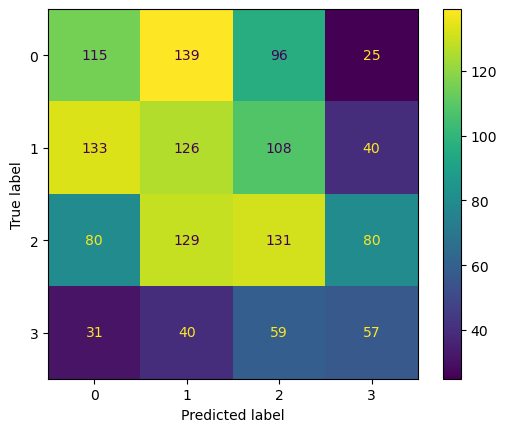

In [288]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gridsearch,X_test,y_test);

In [ ]:
report_df['Round'] = df.Round
report_df['player_grade'] = df.grade
report_df['reportlen'] = df.reportlen

In [289]:
X = df[['grade','reportlen']]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.target)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [291]:
X_train

,grade,reportlen
2218,49.0,21
1688,65.0,11
2242,38.0,35
582,72.0,149
2132,69.0,24
...,...,...
3444,72.0,107
466,91.0,81
3092,71.0,84
3772,75.0,51


In [292]:
num_cols = X_train[['grade','reportlen']]

num_transformer = Pipeline(steps=[('ss',StandardScaler()),
                             ('impute',SimpleImputer(strategy='constant'))])

transformer = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols.columns)
])
pipe = Pipeline([
    ('transformer',transformer),
    ('sample',None),
    ('tree',DecisionTreeClassifier(random_state=42))
])

grid = {
    'sample':[RandomOverSampler(random_state=42),SMOTE(random_state=42)]
}

gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid,
                          cv=5)

              precision    recall  f1-score   support

           0       0.51      0.61      0.55       375
           1       0.43      0.40      0.41       407
           2       0.53      0.48      0.50       420
           3       0.65      0.63      0.64       187

    accuracy                           0.51      1389
   macro avg       0.53      0.53      0.53      1389
weighted avg       0.51      0.51      0.51      1389



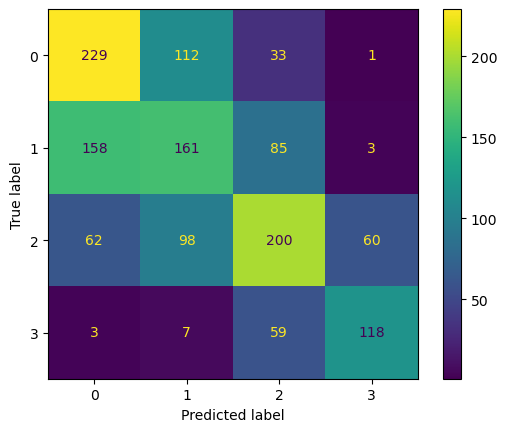

In [293]:
gridsearch.fit(X_train,y_train)
y_pred = gridsearch.predict(X_test)
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gridsearch,X_test,y_test);